In [81]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
data = pd.read_csv("C:\\Users\\ppeix\\OneDrive\\Área de Trabalho\\FIIs.csv", delimiter=',')
data.head()

,FUNDOS,SETOR,PREÇO ATUAL (R$),LIQUIDEZ DIÁRIA (R$),P/VP,ÚLTIMO DIVIDENDO,DIVIDEND YIELD,DY (3M) ACUMULADO,DY (6M) ACUMULADO,DY (12M) ACUMULADO,...,DY PATRIMONIAL,VARIAÇÃO PATRIMONIAL,RENTAB. PATR. PERÍODO,RENTAB. PATR. ACUMULADA,QUANT. ATIVOS,VOLATILIDADE,NUM. COTISTAS,TAX. GESTÃO,TAX. PERFORMANCE,TAX. ADMINISTRAÇÃO
0,AAZQ11,INDEFINIDO,"9,13000","1.043.975,37000","0,95000","0,12000","0,01320","0,03950","0,07790","0,14490",...,"0,01240","0,00000","0,00000","0,00000","0,00000","14,03000","21.961,00000",NaN,NaN,NaN
1,ABCP11,SHOPPINGS,"72,81000","71.781,26000","0,79000","0,65000","0,00930","0,02660","0,04950","0,09390",...,"0,00650","0,00070","0,00720","0,07890","1,00000","15,42000","17.274,00000",NaN,NaN,NaN
2,AFHI11,PAPÉIS,"99,70000","901.427,56000","1,03000","1,00000","0,01030","0,03160","0,06410","0,13130",...,"0,01040","0,01540","0,02590","0,09020","0,00000","8,29000","26.665,00000",NaN,NaN,NaN
3,AGRX11,OUTROS,"10,85000","499.974,93000",NaN,"0,15000","0,01370","0,04090","0,08170","0,17160",...,NaN,NaN,NaN,NaN,"0,00000","15,37000","0,00000",NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,"55,33000","846.203,74000","0,58000","1,33000","0,02330","0,05040","0,08370","0,14680",...,"0,00820","0,01760","0,02600","0,03780","2,00000","16,99000","16.416,00000",NaN,NaN,NaN


# 1. Limpeza Banco de Dados

In [118]:
data.columns = ['Ticker','Setor','Preco','Liquidez_Diaria','PVP','UltimoDividendo','DY','DY_Acumulado3m','DY_Acumulado6m','DY_Acumulado12m',
                'DY_Medio3m','DY_Medio6m','DY_Medio12m','DY_Ano','VariacaoPreco','RentabPeriodo','RentabAcumulada','PatrimonioLiquido','VPA',
                'PVPA','DY_Patrimonial','VariacaoPatrimonial','RentabPatrPeriodo','RentabPatrAcumulada','QuantAtivos', 'Volatilidade', 'NumCotistas',
               'TaxGestao', 'TaxPerformance','TaxAdm']

In [95]:
data.head()

,Ticker,Setor,Preco,Liquidez_Diaria,PVP,UltimoDividendo,DY,DY_Acumulado(3m),DY_Acumulado(6m),DY_Acumulado(12m),...,DY_Patrimonial,VariacaoPatrimonial,RentabPatrPeriodo,RentabPatrAcumulada,QuantAtivos,Volatilidade,NumCotistas,TaxGestao,TaxPerformance,TaxAdm
0,AAZQ11,INDEFINIDO,"9,13000","1.043.975,37000","0,95000","0,12000","0,01320","0,03950","0,07790","0,14490",...,"0,01240","0,00000","0,00000","0,00000","0,00000","14,03000","21.961,00000",NaN,NaN,NaN
1,ABCP11,SHOPPINGS,"72,81000","71.781,26000","0,79000","0,65000","0,00930","0,02660","0,04950","0,09390",...,"0,00650","0,00070","0,00720","0,07890","1,00000","15,42000","17.274,00000",NaN,NaN,NaN
2,AFHI11,PAPÉIS,"99,70000","901.427,56000","1,03000","1,00000","0,01030","0,03160","0,06410","0,13130",...,"0,01040","0,01540","0,02590","0,09020","0,00000","8,29000","26.665,00000",NaN,NaN,NaN
3,AGRX11,OUTROS,"10,85000","499.974,93000",NaN,"0,15000","0,01370","0,04090","0,08170","0,17160",...,NaN,NaN,NaN,NaN,"0,00000","15,37000","0,00000",NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,"55,33000","846.203,74000","0,58000","1,33000","0,02330","0,05040","0,08370","0,14680",...,"0,00820","0,01760","0,02600","0,03780","2,00000","16,99000","16.416,00000",NaN,NaN,NaN


In [119]:
data.Preco = data.Preco.str.replace('.','')
data.Preco = data.Preco.str.replace(',','.')
data.Preco = data.Preco.astype(float)

data.Liquidez_Diaria = data.Liquidez_Diaria.str.replace('.','')
data.Liquidez_Diaria = data.Liquidez_Diaria.str.replace(',','.')
data.Liquidez_Diaria = data.Liquidez_Diaria.astype(float)

data.PVP = data.PVP.str.replace('.','')
data.PVP = data.PVP.str.replace(',','.')
data.PVP = data.PVP.astype(float)

data.UltimoDividendo = data.UltimoDividendo.str.replace('.','')
data.UltimoDividendo = data.UltimoDividendo.str.replace(',','.')
data.UltimoDividendo = data.UltimoDividendo.astype(float)

data.DY = data.DY.str.replace('.','')
data.DY = data.DY.str.replace(',','.')
data.DY = data.DY.astype(float)

data.DY_Acumulado3m = data.DY_Acumulado3m.str.replace('.','')
data.DY_Acumulado3m = data.DY_Acumulado3m.str.replace(',','.')
data.DY_Acumulado3m = data.DY_Acumulado3m.astype(float)

data.DY_Acumulado6m = data.DY_Acumulado6m.str.replace('.','')
data.DY_Acumulado6m = data.DY_Acumulado6m.str.replace(',','.')
data.DY_Acumulado6m = data.DY_Acumulado6m.astype(float)

data.DY_Acumulado12m = data.DY_Acumulado12m.str.replace('.','')
data.DY_Acumulado12m = data.DY_Acumulado12m.str.replace(',','.')
data.DY_Acumulado12m = data.DY_Acumulado12m.astype(float)

data.DY_Medio3m = data.DY_Medio3m.str.replace('.','')
data.DY_Medio3m = data.DY_Medio3m.str.replace(',','.')
data.DY_Medio3m = data.DY_Medio3m.astype(float)

data.DY_Medio6m = data.DY_Medio6m.str.replace('.','')
data.DY_Medio6m = data.DY_Medio6m.str.replace(',','.')
data.DY_Medio6m = data.DY_Medio6m.astype(float)

data.DY_Medio12m = data.DY_Medio12m.str.replace('.','')
data.DY_Medio12m = data.DY_Medio12m.str.replace(',','.')
data.DY_Medio12m = data.DY_Medio12m.astype(float)


data.DY_Ano = data.DY_Ano.str.replace('.','')
data.DY_Ano = data.DY_Ano.str.replace(',','.')
data.DY_Ano = data.DY_Ano.astype(float)

data.VariacaoPreco = data.VariacaoPreco.str.replace('.','')
data.VariacaoPreco = data.VariacaoPreco.str.replace(',','.')
data.VariacaoPreco = data.VariacaoPreco.astype(float)

data.RentabPeriodo = data.RentabPeriodo.str.replace('.','')
data.RentabPeriodo = data.RentabPeriodo.str.replace(',','.')
data.RentabPeriodo = data.RentabPeriodo.astype(float)

data.RentabAcumulada = data.RentabAcumulada.str.replace('.','')
data.RentabAcumulada = data.RentabAcumulada.str.replace(',','.')
data.RentabAcumulada = data.RentabAcumulada.astype(float)

data.PatrimonioLiquido = data.PatrimonioLiquido.str.replace('.','')
data.PatrimonioLiquido = data.PatrimonioLiquido.str.replace(',','.')
data.PatrimonioLiquido = data.PatrimonioLiquido.astype(float)

data.VPA = data.VPA.str.replace('.','')
data.VPA = data.VPA.str.replace(',','.')
data.VPA = data.VPA.astype(float)

data.PVPA = data.PVPA.str.replace('.','')
data.PVPA = data.PVPA.str.replace(',','.')
data.PVPA = data.PVPA.astype(float)

data.DY_Patrimonial = data.DY_Patrimonial.str.replace('.','')
data.DY_Patrimonial = data.DY_Patrimonial.str.replace(',','.')
data.DY_Patrimonial = data.DY_Patrimonial.astype(float)

data.VariacaoPatrimonial = data.VariacaoPatrimonial.str.replace('.','')
data.VariacaoPatrimonial = data.VariacaoPatrimonial.str.replace(',','.')
data.VariacaoPatrimonial = data.VariacaoPatrimonial.astype(float)

data.RentabPatrPeriodo = data.RentabPatrPeriodo.str.replace('.','')
data.RentabPatrPeriodo = data.RentabPatrPeriodo.str.replace(',','.')
data.RentabPatrPeriodo = data.RentabPatrPeriodo.astype(float)

data.RentabPatrAcumulada = data.RentabPatrAcumulada.str.replace('.','')
data.RentabPatrAcumulada = data.RentabPatrAcumulada.str.replace(',','.')
data.RentabPatrAcumulada = data.RentabPatrAcumulada.astype(float)

data.QuantAtivos = data.QuantAtivos.str.replace('.','')
data.QuantAtivos = data.QuantAtivos.str.replace(',','.')
data.QuantAtivos = data.QuantAtivos.astype(float)

data.Volatilidade = data.Volatilidade.str.replace('.','')
data.Volatilidade = data.Volatilidade.str.replace(',','.')
data.Volatilidade = data.Volatilidade.astype(float)

data.NumCotistas = data.NumCotistas.str.replace('.','')
data.NumCotistas = data.NumCotistas.str.replace(',','.')
data.NumCotistas = data.NumCotistas.astype(float)


data.head()

,Ticker,Setor,Preco,Liquidez_Diaria,PVP,UltimoDividendo,DY,DY_Acumulado3m,DY_Acumulado6m,DY_Acumulado12m,...,DY_Patrimonial,VariacaoPatrimonial,RentabPatrPeriodo,RentabPatrAcumulada,QuantAtivos,Volatilidade,NumCotistas,TaxGestao,TaxPerformance,TaxAdm
0,AAZQ11,INDEFINIDO,9.13,1043975.37,0.95,0.12,0.0132,0.0395,0.0779,0.1449,...,0.0124,0.0000,0.0000,0.0000,0.0,14.03,21961.0,NaN,NaN,NaN
1,ABCP11,SHOPPINGS,72.81,71781.26,0.79,0.65,0.0093,0.0266,0.0495,0.0939,...,0.0065,0.0007,0.0072,0.0789,1.0,15.42,17274.0,NaN,NaN,NaN
2,AFHI11,PAPÉIS,99.70,901427.56,1.03,1.00,0.0103,0.0316,0.0641,0.1313,...,0.0104,0.0154,0.0259,0.0902,0.0,8.29,26665.0,NaN,NaN,NaN
3,AGRX11,OUTROS,10.85,499974.93,NaN,0.15,0.0137,0.0409,0.0817,0.1716,...,NaN,NaN,NaN,NaN,0.0,15.37,0.0,NaN,NaN,NaN
4,AIEC11,LAJES CORPORATIVAS,55.33,846203.74,0.58,1.33,0.0233,0.0504,0.0837,0.1468,...,0.0082,0.0176,0.0260,0.0378,2.0,16.99,16416.0,NaN,NaN,NaN


# 2. Analise Exploratoria

In [120]:
data[['Ticker','Setor']].loc[data.Ticker == 'BTLG11']

,Ticker,Setor
62,BTLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS


## 2.1. Análise Fundos de Imóveis Industriais e Logísticos

In [121]:
data_fundos_log = data[data.Setor == 'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS']
data_fundos_log.shape[0]

41

In [122]:
data_fundos_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 10 to 429
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               41 non-null     object 
 1   Setor                41 non-null     object 
 2   Preco                41 non-null     float64
 3   Liquidez_Diaria      41 non-null     float64
 4   PVP                  41 non-null     float64
 5   UltimoDividendo      41 non-null     float64
 6   DY                   40 non-null     float64
 7   DY_Acumulado3m       40 non-null     float64
 8   DY_Acumulado6m       40 non-null     float64
 9   DY_Acumulado12m      40 non-null     float64
 10  DY_Medio3m           40 non-null     float64
 11  DY_Medio6m           40 non-null     float64
 12  DY_Medio12m          40 non-null     float64
 13  DY_Ano               40 non-null     float64
 14  VariacaoPreco        40 non-null     float64
 15  RentabPeriodo        40 non-null     float64


### 2.1.1. Funções

In [176]:
def analise_medidas_descritivas(df, kde, bins):
    print("Media: ",df.mean().round(2))
    print("Mediana: ",df.median().round(2))
    print("Desvio Padrao: ",df.std().round(2))
    
    plt.figure(figsize=(15,4))
    sns.histplot(df, kde=True, bins=bins)
    plt.figure(figsize=(15,2))

    sns.boxplot(df, orient='h')

### 2.1.2. Indicadores de Preço

Media:  0.86
Mediana:  0.89
Desvio Padrao:  0.19


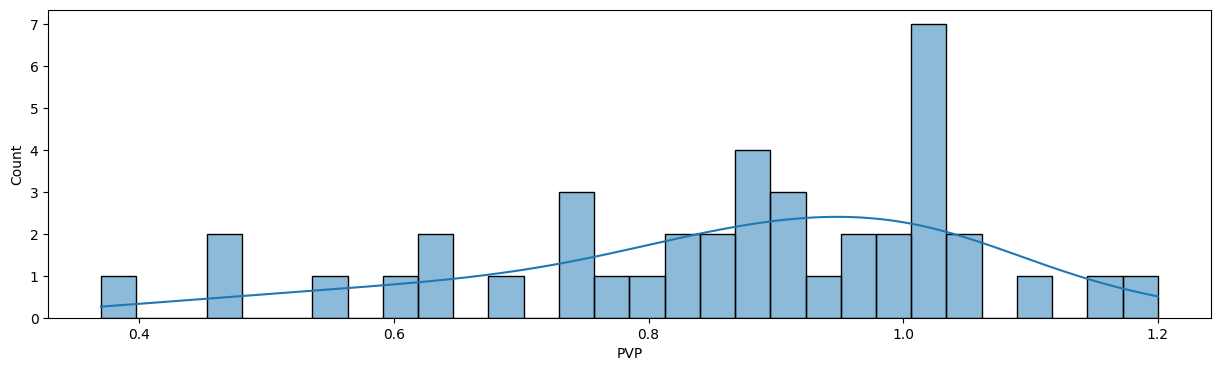

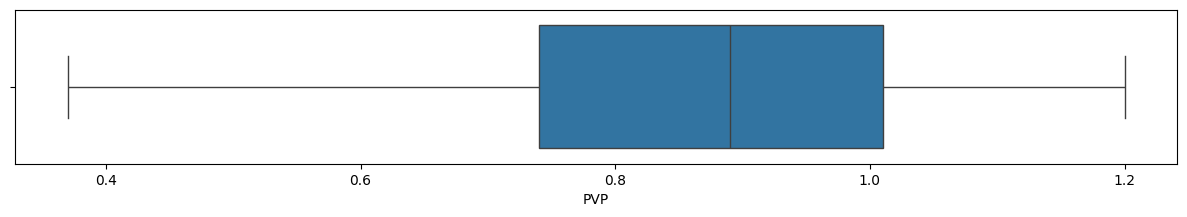

In [177]:
analise_medidas_descritivas(data_fundos_log.PVP, True, 30)

Media:  0.84
Mediana:  0.88
Desvio Padrao:  0.18


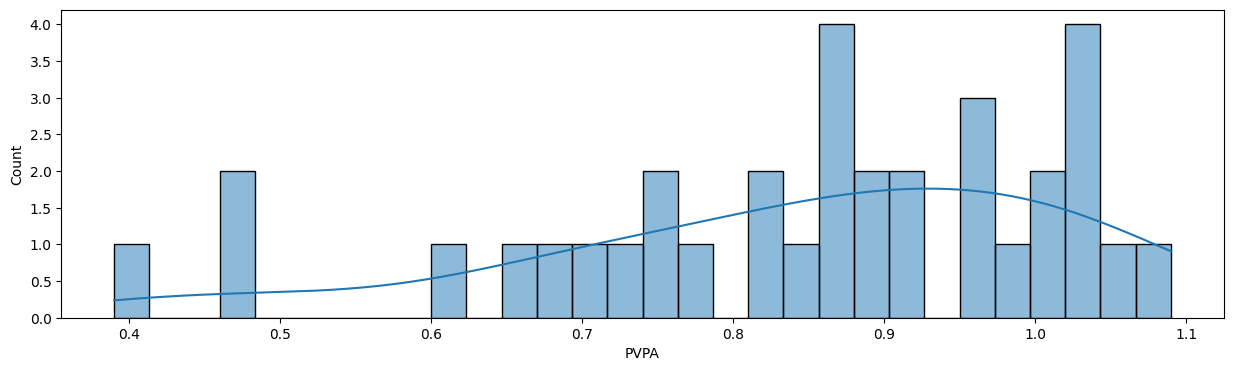

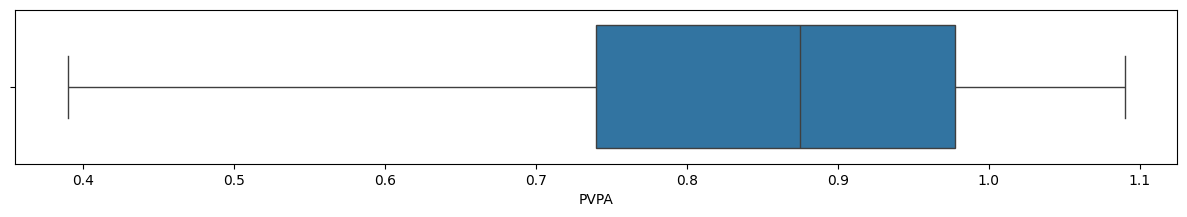

In [178]:
analise_medidas_descritivas(data_fundos_log.PVPA, True, 30)

### 2.1.2. Indicadores de Dividendos

Media:  0.01
Mediana:  0.01
Desvio Padrao:  0.0


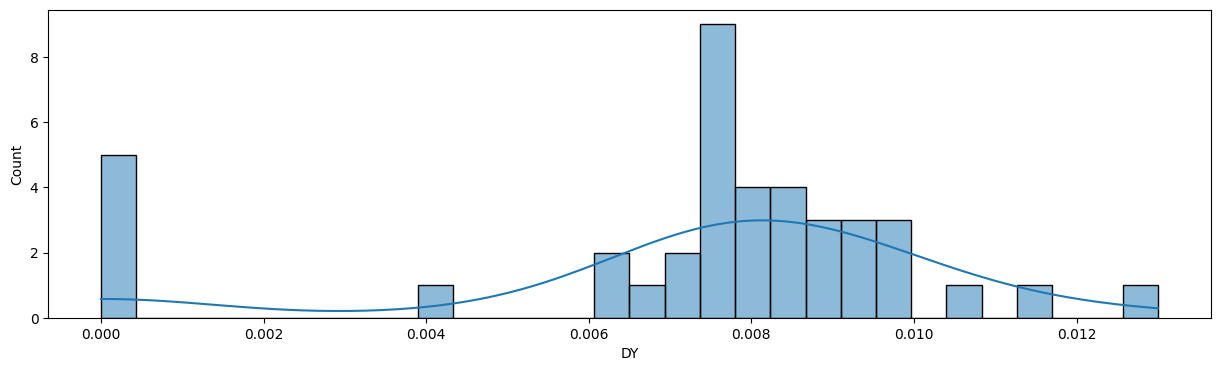

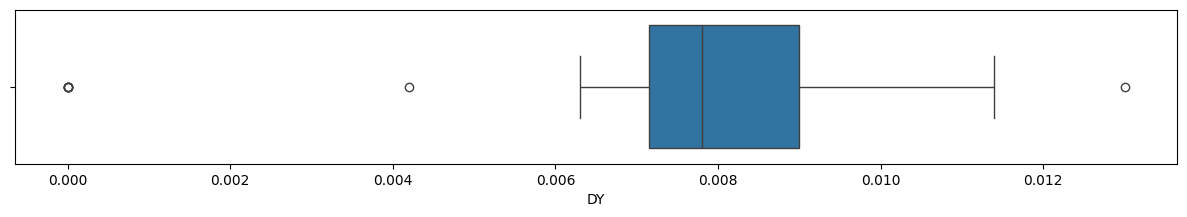

In [179]:
analise_medidas_descritivas(data_fundos_log.DY, True, 30)

Media:  0.01
Mediana:  0.01
Desvio Padrao:  0.0


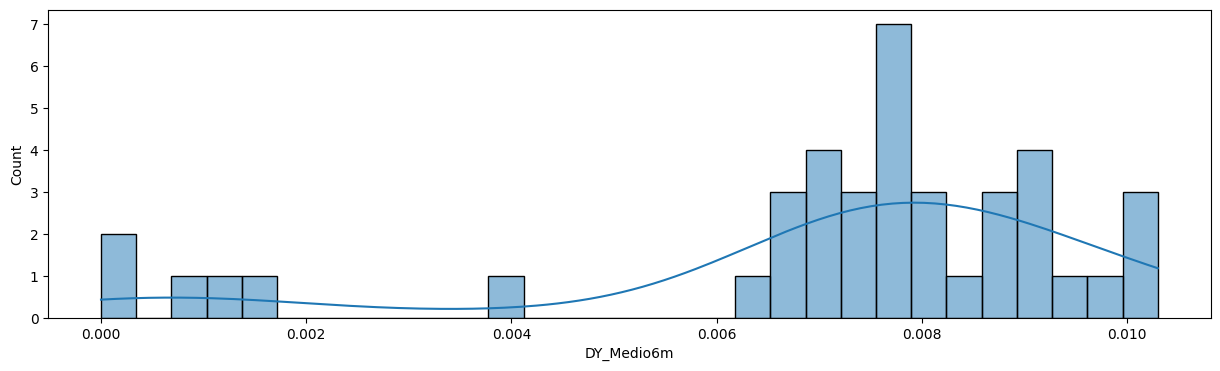

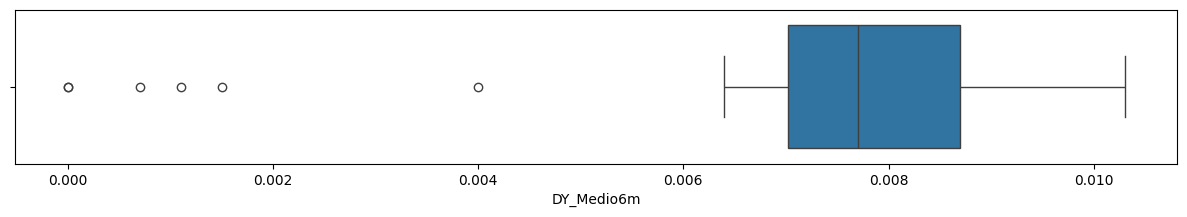

In [180]:
analise_medidas_descritivas(data_fundos_log.DY_Medio6m, True, 30)

Media:  0.01
Mediana:  0.01
Desvio Padrao:  0.0


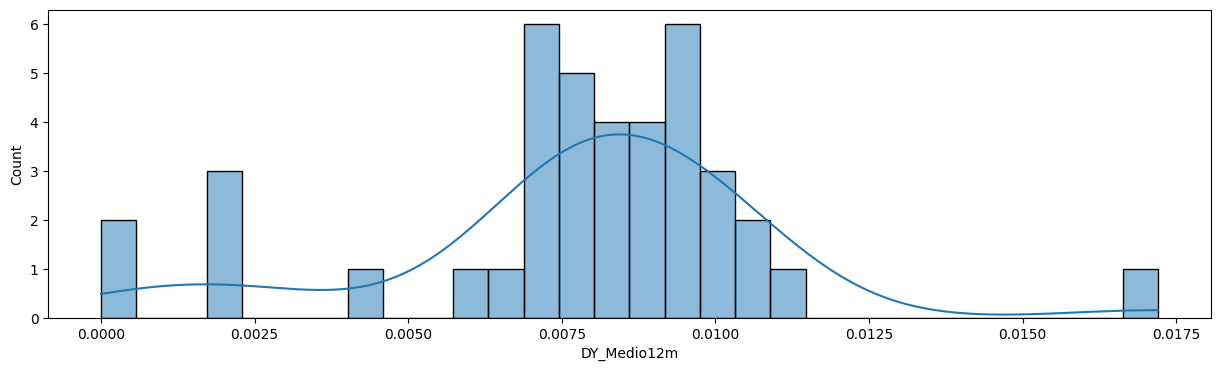

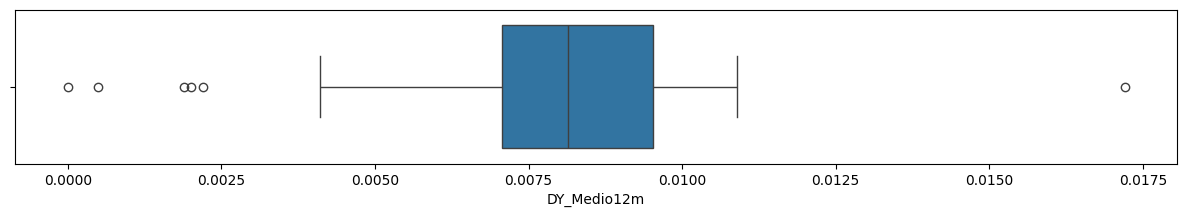

In [181]:
analise_medidas_descritivas(data_fundos_log.DY_Medio12m, True, 30)

### 2.1.3. Volatilidade

Media:  34.83
Mediana:  16.63
Desvio Padrao:  73.23


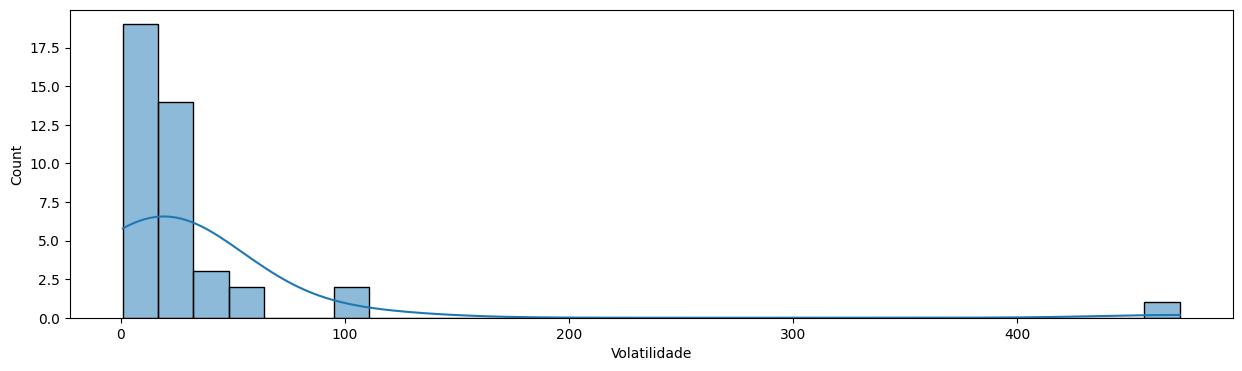

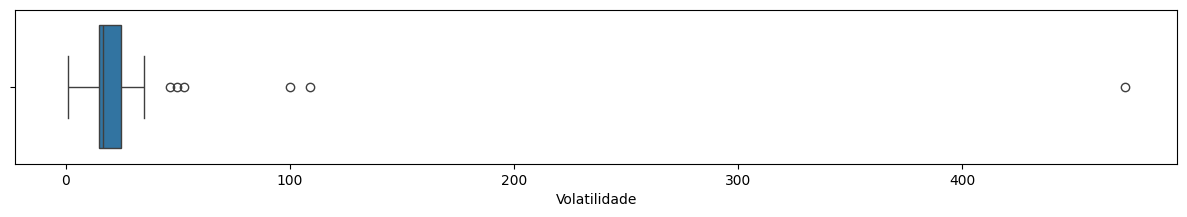

In [182]:
analise_medidas_descritivas(data_fundos_log.Volatilidade, True, 30)

### 2.1.4. Liquidez Diaria e Num de Cotistas

Media:  1425087.36
Mediana:  251174.81
Desvio Padrao:  2677933.97


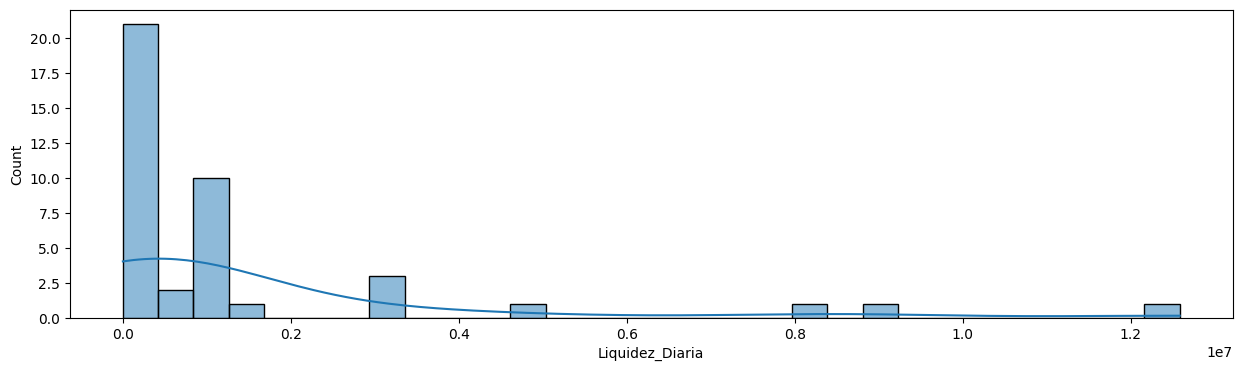

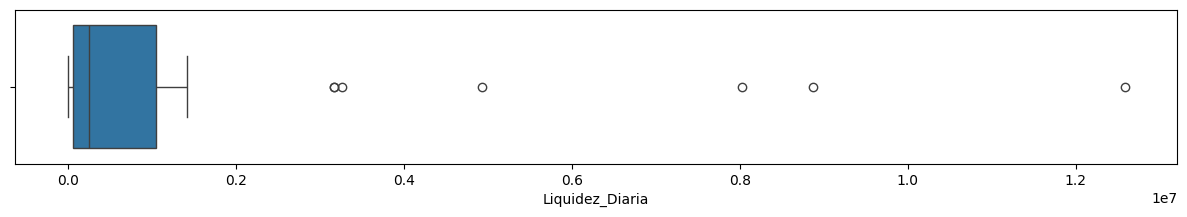

In [183]:
analise_medidas_descritivas(data_fundos_log.Liquidez_Diaria, True, 30)

Media:  50794.2
Mediana:  7508.0
Desvio Padrao:  93232.39


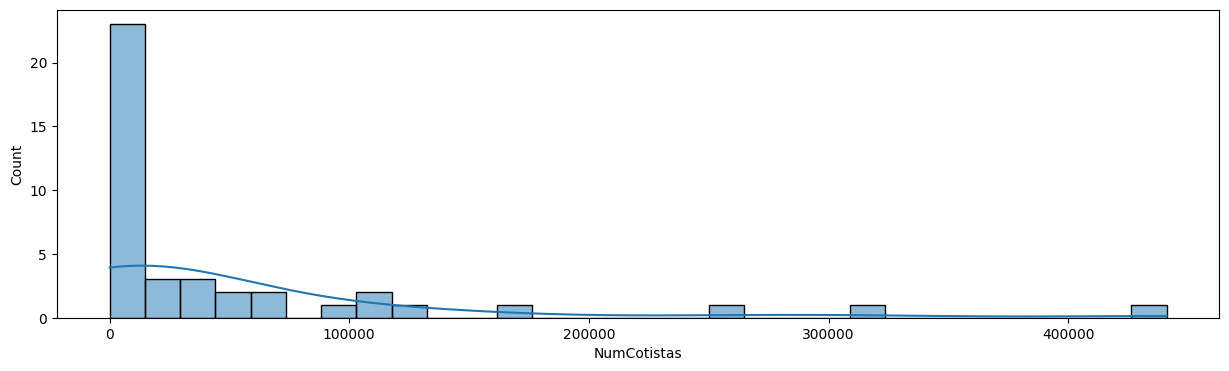

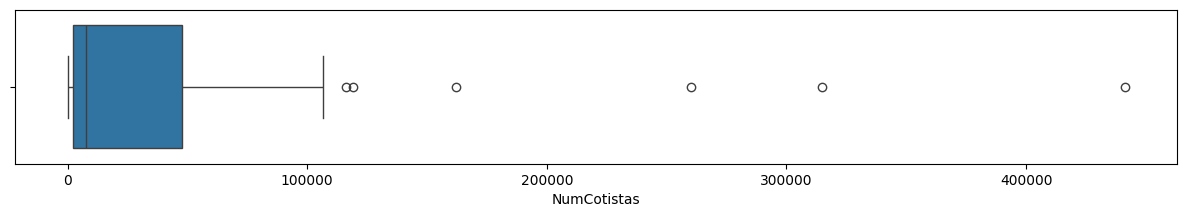

In [184]:
analise_medidas_descritivas(data_fundos_log.NumCotistas, True, 30)

### 2.1.5. Combinando análises para escolher melhores fundos

In [207]:
df_result = data_fundos_log[(data_fundos_log.PVP < (data_fundos_log.PVP.mean() + data_fundos_log.PVP.std()))]                            
df_result = df_result[(df_result.Liquidez_Diaria > (df_result.Liquidez_Diaria.mean() + df_result.Liquidez_Diaria.std()))]
df_result = df_result[(df_result.DY_Medio12m > (df_result.DY_Medio12m.mean() + df_result.DY_Medio12m.std()))]
df_result

,Ticker,Setor,Preco,Liquidez_Diaria,PVP,UltimoDividendo,DY,DY_Acumulado3m,DY_Acumulado6m,DY_Acumulado12m,...,DY_Patrimonial,VariacaoPatrimonial,RentabPatrPeriodo,RentabPatrAcumulada,QuantAtivos,Volatilidade,NumCotistas,TaxGestao,TaxPerformance,TaxAdm
62,BTLG11,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,103.0,8032641.52,1.04,0.76,0.0075,0.0226,0.0446,0.0903,...,0.0077,0.0029,0.0106,0.0628,20.0,9.55,260030.0,NaN,NaN,NaN
